In [46]:
from pandas.plotting import register_matplotlib_converters
from scipy.stats import pearsonr 
from scipy.stats import linregress
from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})

In [47]:
inflation= pd.read_csv('data/inflation.csv', sep=",")
monetary_base= pd.read_csv('data/monetary_base.csv', sep=",", thousands='.')

In [48]:
inflation['Dates'] = pd.to_datetime(inflation['Dates'], format='%d/%m/%Y')    
inflation.index = inflation['Dates']
inflation = inflation.drop(['Dates'], axis=1)

In [49]:
monetary_base['Dates'] = pd.to_datetime(monetary_base['Dates'], format='%d/%m/%Y')    
monetary_base.index = monetary_base['Dates']
monetary_base = monetary_base.drop(['Dates'], axis=1)

[None]

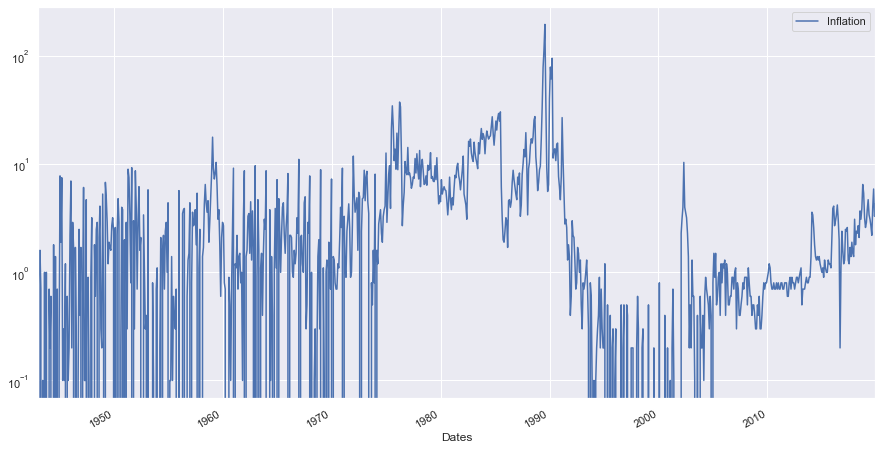

In [50]:
ax = inflation.plot()
ax.set(yscale="log")

[None]

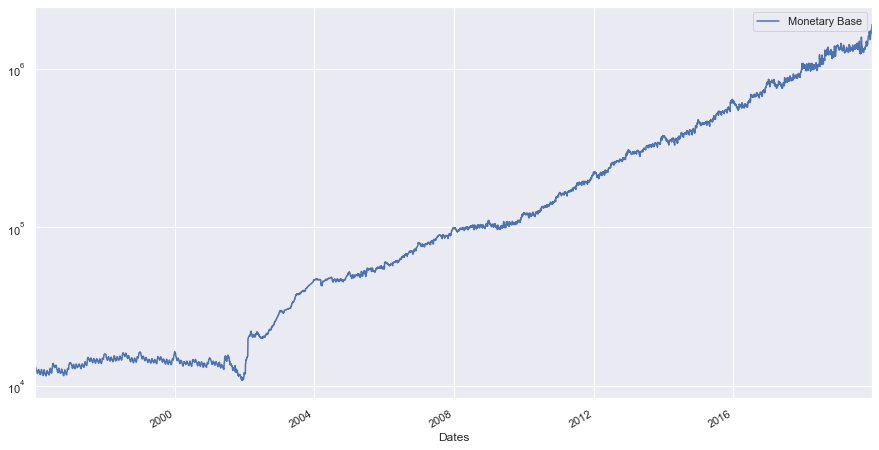

In [51]:
ax = monetary_base.plot()
ax.set(yscale="log")

In [52]:
inflation_1996 = {}
monetary_base_change_1996 = {}
data_1996 = {}
months=[1,3,6,12]
for m in months:
    inflation_1996[m] = inflation.truncate(before = '1996-01-01')
    inflation_1996[m] = inflation_1996[m].apply(lambda x : x/100+1)
    inflation_1996[m] = inflation_1996[m].resample(str(m) + 'M').apply(lambda x:x.cumprod()[-1])
    inflation_1996[m] = inflation_1996[m].apply(lambda x:(x-1)*100)
    monetary_base_change_1996[m] = monetary_base.truncate(before='1996-01-01')
    monetary_base_change_1996[m] = monetary_base_change_1996[m].resample(str(m) + 'M').mean().pct_change()*100
    data_1996[m] = pd.DataFrame(monetary_base_change_1996[m])
    data_1996[m] = data_1996[m].assign(Inflation = inflation_1996[m]['Inflation']).dropna()

In [53]:
pearson_lagged={}
for m in months:
    max_lag=12*4//m
    pearson_lagged[m]= [data_1996[m]['Inflation'].corr(data_1996[m]['Monetary Base'].shift(lag)) for lag in np.arange(0, max_lag+1, 1)]

In [54]:
to_plot=pd.DataFrame()
for m in months:
    to_plot=to_plot.append(pd.DataFrame([np.linspace(0,4,len(pearson_lagged[m])),pearson_lagged[m],[str(m)+ 'm']*len(pearson_lagged[m])]).T)
to_plot=to_plot.rename(columns={2:'months'})

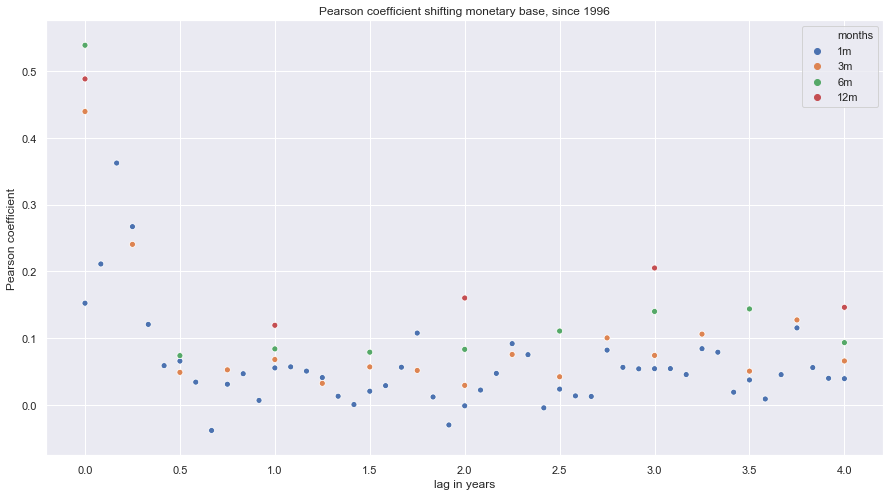

In [55]:
ax = sns.scatterplot(x=to_plot[0],y=to_plot[1],data=to_plot,hue='months')
ax.set(xlabel='lag in years', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, since 1996')
ax